# Project 10 – Clustering
Γεώργιος Δάλλας
ΑΕΜ: 217

## 1.
First i load the dataframe, seperate Number, Track Id, Artists, Album Name, Track Name into a new frame and one hot encode the genres

In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN


In [49]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [50]:
data_sep = data[['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']]
data = data.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])
encoder = OneHotEncoder(sparse_output=False)
genres_enc = encoder.fit_transform(data[['track_genre']])
genres_df = pd.DataFrame(genres_enc, columns=encoder.get_feature_names_out(['track_genre']))
data = data.drop(columns=['track_genre'])
data= pd.concat([data, genres_df], axis=1)

data1 = data.drop_duplicates()
data1.describe()



,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
count,106907.000000,1.069070e+05,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,...,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000,106907.000000
mean,35.358124,2.299929e+05,0.565062,0.642874,5.303544,-8.302353,0.634103,0.085476,0.313754,0.163289,...,0.009223,0.009335,0.008624,0.008886,0.009345,0.009251,0.009083,0.009157,0.009242,0.009307
std,21.336746,1.085502e+05,0.173726,0.252413,3.555742,5.060974,0.481683,0.107626,0.332755,0.314984,...,0.095593,0.096167,0.092466,0.093847,0.096215,0.095737,0.094870,0.095256,0.095689,0.096024
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.754930e+05,0.454000,0.471000,2.000000,-10.081000,0.000000,0.035900,0.015400,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,2.147610e+05,0.578000,0.686000,5.000000,-7.056000,1.000000,0.049000,0.168000,0.000058,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,2.642930e+05,0.693000,0.856000,8.000000,-5.019000,1.000000,0.085000,0.596000,0.068350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2.
Normalization / scaling

In [51]:

scaler = MinMaxScaler()
data = scaler.fit_transform(data1)


## 3.
K means and line plot with sse vs clusters printed

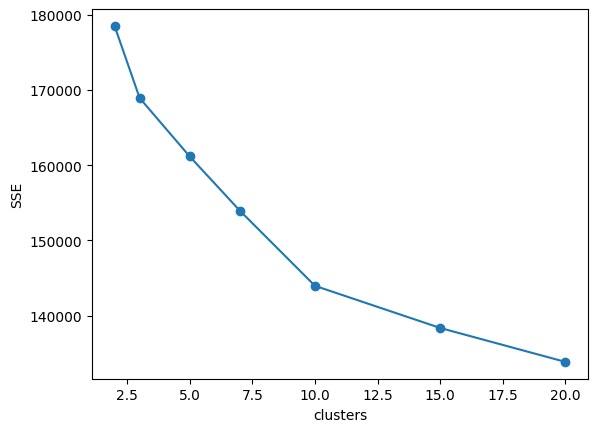

In [52]:

sse = []
k_values = [2, 3, 5, 7, 10, 15, 20]
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)
plt.plot(k_values, sse, marker='o')
plt.xlabel('clusters')
plt.ylabel('SSE')
plt.show()



## 4.
By using the elbow method, we see that 10 is the clusters we want to keep

In [53]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)
labels = kmeans.labels_


## 5.
finding whcih genre corresponds to each cluster

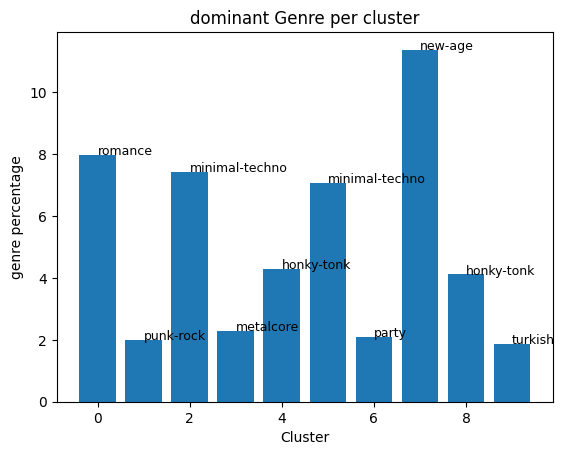

In [ ]:
data1 = data1.drop_duplicates().reset_index(drop=True)


data_with_clusters = data1.copy()
data_with_clusters['cluster'] = labels

genre_columns = genres_df.columns.tolist()


results = []

for cluster_id in sorted(data_with_clusters['cluster'].unique()):
    cluster_data = data_with_clusters[data_with_clusters['cluster'] == cluster_id]
    
    genre_counts = cluster_data[genre_columns].sum()
    dominant_genre = genre_counts.idxmax()
    dominant_count = genre_counts.max()
    percentage = (dominant_count / len(cluster_data)) * 100
    results.append({
        'Cluster': cluster_id,
        'Dominant Genre': dominant_genre.replace('track_genre_', ''),
        'Dominant Genre Percentage': percentage
    })
results_df = pd.DataFrame(results)



plt.figure()
bars = plt.bar(results_df['Cluster'],results_df['Dominant Genre Percentage'])
plt.xlabel('Cluster')
plt.ylabel('genre percentage')
plt.title('dominant Genre per cluster')

for bar, genre in zip(bars, results_df['Dominant Genre']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,height,genre,fontsize=9)

plt.show()



## 6.
By finding a song i like i can create a rec sys using eucl distance to find 3 nearest in the cluster. Out of the 3 none is even a little bit similar. The reason is that by having so few clusters a ton of songs are merged together.

In [ ]:
data_rec = data1.copy()
data_rec['cluster'] = labels
data_rec = pd.concat([data_sep.reset_index(drop=True), data_rec],axis=1)

song_name = "Arsonist's Lullabye"

query_song = data_rec[data_rec['track_name'] == song_name].iloc[0]
query_index = query_song.name
query_cluster = query_song['cluster']
cluster_indices = data_with_clusters[data_with_clusters['cluster'] == query_cluster].index
print("Artist of song searched for check up: ", query_song['artists'])


distances = pairwise_distances(
    data[query_index].reshape(1, -1),
    data[cluster_indices],
    metric='euclidean'
).flatten()
nearest_indices = cluster_indices[np.argsort(distances)[1:4]]
recommendations = data_rec.loc[nearest_indices, ['track_name', 'artists', 'album_name']]
print(recommendations)


Artist of song searched for check up:  Hozier
                    track_name  \
99777                 Ring Pop   
99597  Unwrap You at Christmas   
99950               Kya Bolein   

                                                 artists       album_name  
99777                                                Jax         Ring Pop  
99597                                        The Monkees  Merry Christmas  
99950  Bawari Basanti;Ejaz Hussain;Mohit Lal;Abhishek...       Kya Bolein  


## 7.
By using the cosine similarity the first 3 results are exactly the same.

In [ ]:

distances = pairwise_distances(
    data[query_index].reshape(1, -1),
    data[cluster_indices],
    metric='cosine'  
).flatten()
nearest_indices = cluster_indices[np.argsort(distances)[1:4]]
recommendations = data_rec.loc[nearest_indices, ['track_name', 'artists', 'album_name']]
print(recommendations)

                    track_name  \
99777                 Ring Pop   
99597  Unwrap You at Christmas   
99950               Kya Bolein   

                                                 artists       album_name  
99777                                                Jax         Ring Pop  
99597                                        The Monkees  Merry Christmas  
99950  Bawari Basanti;Ejaz Hussain;Mohit Lal;Abhishek...       Kya Bolein  


## 8-9.
DBSCAN shows a huge difference in clusters. Now the clusters look more correct since there are 150k songs and groups are 451 instead of 10.

In [57]:

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')  

dbscan_labels = dbscan.fit_predict(data)

n_clusters = len(set(dbscan_labels))
if -1 in dbscan_labels:
    n_clusters= n_clusters-1
print("Number of clusters:", n_clusters)

Number of clusters: 451
